In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
%config InlineBackend.figure_format='svg'

In [70]:
def lagrange(X):
    '''
    Quadratic elements only
    '''
    x0,x1,x2 = X
    x= np.linspace(x0,x2)
    N0 = (x-x1)*(x-x2)/((x0-x1)*(x0-x2))
    N1 = (x-x0)*(x-x2)/((x1-x0)*(x1-x2))
    N2 = (x-x0)*(x-x1)/((x2-x0)*(x2-x1))
    dN0 = (2*x-x1-x2)/((x0-x1)*(x0-x2))
    dN1 = (2*x-x0-x2)/((x1-x0)*(x1-x2))
    dN2 = (2*x-x0-x1)/((x2-x0)*(x2-x1))
    return [N0,N1,N2], [dN0,dN1,dN2], x

def lagrange_lin(X):
    '''
    Linear elements
    '''
    x0,x1 = X
    x = np.linspace(x0,x1)
    N0 = (x-x1)/(x0-x1)
    N1 = (x-x0)/(x1-x0)
    dN0 = 1/(x0-x1)
    dN1 = 1/(x1-x0)
    return [N0,N1], [np.ones_like(x)*dN0,np.ones_like(x)*dN1], x

In [96]:
xl = 0.0
xr = 1000
v = 1e-7
Cl = 0.01
Cr = 0.0
s = 4e-10
D = 1e-3
nelem = 3
deg = 2
nnodes = deg*nelem + 1

In [97]:
K = np.zeros((nnodes,nnodes))
F = np.zeros(nnodes)
nodes = np.linspace(xl,xr,nnodes)
for e in range(nelem):
    nodes_elem = nodes[e*deg:e*deg+deg+1]
    if deg == 2:
        N,Nx,xelem = lagrange(nodes_elem)
        
    else:
        N,Nx,xelem = lagrange_lin(nodes_elem)
    for i in range(deg+1):
        If = N[i]*s
        F[deg*e+i] += np.trapz(If,x=xelem)
        for j in range(deg+1):
            Ia = Nx[i]*Nx[j]*D
            Ib = N[i]*Nx[j]*v
            K[deg*e+i,deg*e+j] += np.trapz(Ia,x=xelem)
            K[deg*e+i,deg*e+j] += np.trapz(Ib,x=xelem)

In [98]:
K[0,:] *= 0
K[0,0] = 1
K[-1,:] *= 0
K[-1,-1] = 1
F[0] = Cl
F[-1] = Cr

In [99]:
sol = np.linalg.solve(K,F)
print(sol)

[0.01       0.0358614  0.05096651 0.05510774 0.0481281  0.02981296
 0.        ]


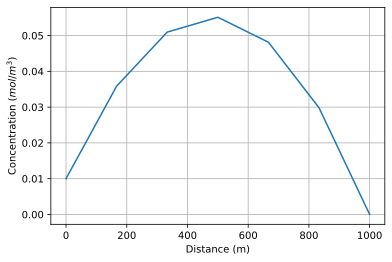

In [100]:
plt.plot(nodes,sol)
plt.grid()
plt.ylabel('Concentration ($mol/m^3$)')
plt.xlabel('Distance (m)')
plt.show()

In [101]:
xsol = []
ysol = []
for e in range(nelem):
    xnodes = nodes[deg*e:deg*e+deg+1]
    N,Nx,xelem = lagrange(xnodes)
    y = np.zeros_like(xelem)
    for i,n in enumerate(N):
        y += n*sol[e*deg+i]
    xsol.append(xelem)
    ysol.append(y)

In [102]:
xsol = np.stack(xsol).flatten()
ysol = np.stack(ysol).flatten()

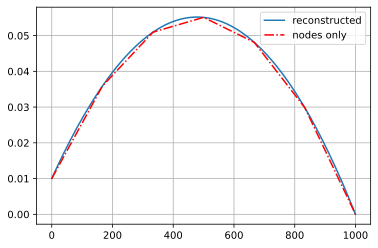

In [103]:
plt.plot(xsol,ysol,label='reconstructed')
plt.plot(nodes,sol,'r-.',label='nodes only')
plt.legend()
plt.grid()